In [286]:
%load_ext autoreload
%autoreload 2

import compression as C
import backports.lzma as lzma
import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline

ac3 = C.Util.load_data('ac3', -1)

# maybe this can be tuned
LZMA_filters = [{"id": lzma.FILTER_LZMA1, "preset": lzma.PRESET_EXTREME}]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
i_shape, delta_indices, indices, data = C.SRLE.encode(ac3[0])
print C.Util.get_size(C.LZMA.compress(i_shape, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(delta_indices, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(indices, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(data, format=lzma.FORMAT_RAW, filters=LZMA_filters))

14
16632
15399
3627


In [90]:
ui8, ui16, ui32, ui64 = C.Extract.encode(delta_indices)
p_ui8 = C.Pack.encode(ui8, delimiter=0, include_delimiter=True)
print C.Util.get_size(C.LZMA.compress(p_ui8[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(ui16, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(ui32, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(ui64, format=lzma.FORMAT_RAW, filters=LZMA_filters))


16241
467
10
10


In [91]:
ui8, ui16, ui32, ui64 = C.Extract.encode(indices)
p_ui8 = C.Pack.encode(ui8, include_delimiter=True)
print C.Util.get_size(C.LZMA.compress(p_ui8[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(ui16, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(ui32, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print C.Util.get_size(C.LZMA.compress(ui64, format=lzma.FORMAT_RAW, filters=LZMA_filters))


4968
10573
10
10


In [77]:
packed_data = C.Pack.encode(data)
print C.Util.get_size(C.LZMA.compress(packed_data[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
unpacked_data = C.Pack.decode(packed_data[0], packed_data[1], include_delimiter=False)
np.array_equal(unpacked_data, data)

2967


True

In [93]:
all = i_shape.tobytes() + ui8.tobytes() + ui16.tobytes() + ui32.tobytes() + ui64.tobytes() + packed_data[1].tobytes()

In [94]:
print C.Util.get_size(C.LZMA.compress(all, format=lzma.FORMAT_RAW, filters=LZMA_filters))

19068


In [ ]:
all = i_shape.tobytes() + ui8.tobytes() + ui16.tobytes() + ui32.tobytes() + ui64.tobytes() + packed_data[1].tobytes()

In [112]:
total_bytes = 0
total_bytes += C.Util.get_size(C.LZMA.compress(i_shape, format=lzma.FORMAT_RAW, filters=LZMA_filters))

ui8, ui16, ui32, ui64 = C.Extract.encode(indices)
p_ui8 = C.Pack.encode(ui8, include_delimiter=True, delimiter=0)
total_bytes += C.Util.get_size(C.LZMA.compress(p_ui8[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
total_bytes += C.Util.get_size(C.LZMA.compress(ui16, format=lzma.FORMAT_RAW, filters=LZMA_filters))
total_bytes += C.Util.get_size(C.LZMA.compress(ui32, format=lzma.FORMAT_RAW, filters=LZMA_filters))
total_bytes += C.Util.get_size(C.LZMA.compress(ui64, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print 'Indices:', total_bytes

packed_data = C.Pack.encode(data)
total_bytes += C.Util.get_size(C.LZMA.compress(packed_data[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
print total_bytes

Indices: 15575
18542


In [113]:
total_bytes = 0
total_bytes += C.Util.get_size(C.LZMA.compress(i_shape, format=lzma.FORMAT_RAW, filters=LZMA_filters))

ui8, ui16, ui32, ui64 = C.Extract.encode(delta_indices)
p_ui8 = C.Pack.encode(ui8, include_delimiter=True, delimiter=0)
total_bytes += C.Util.get_size(C.LZMA.compress(p_ui8[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
total_bytes += C.Util.get_size(C.LZMA.compress(ui16, format=lzma.FORMAT_RAW, filters=LZMA_filters))
total_bytes += C.Util.get_size(C.LZMA.compress(ui32, format=lzma.FORMAT_RAW, filters=LZMA_filters))
total_bytes += C.Util.get_size(C.LZMA.compress(ui64, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print 'Indices:', total_bytes

packed_data = C.Pack.encode(data)
total_bytes += C.Util.get_size(C.LZMA.compress(packed_data[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
print total_bytes

Indices: 16742
19709


In [104]:
p_ui8

(38, array([255,  52,  27, ...,  39, 255,   0], dtype=uint8))

In [78]:
decoded = C.SRLE.decode(i_shape,delta_indices,unpacked_data)
np.array_equal(ac3[0],decoded)

True

In [86]:
print C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0]), format=lzma.FORMAT_RAW, filters=LZMA_filters))

15455


In [153]:
rle2_shape, rle2_indices, rle2_values = C.RLE2.encode(ac3[0])


# rle2_indices = C.Util.to_best_type(rle2_indices)
# rle2_values = C.Util.to_best_type(rle2_values)

total_bytes = C.Util.get_size(C.LZMA.compress(rle2_indices, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print total_bytes
data_bytes = C.Util.get_size(C.LZMA.compress(rle2_values, format=lzma.FORMAT_RAW, filters=LZMA_filters))
print '1',data_bytes
packed_data = C.Pack.encode(data)
data_bytes = C.Util.get_size(C.LZMA.compress(packed_data[1], format=lzma.FORMAT_RAW, filters=LZMA_filters))
print '2',data_bytes
total_bytes += data_bytes

reconstructed = C.RLE2.decode(rle2_shape, rle2_indices, rle2_values)
print total_bytes

print '00000'

all_b = rle2_indices.tobytes() + packed_data[1].tobytes()
# all_b = C.RLE.encode(ac3[0]).tobytes()
# all_b = rle2_indices.tobytes()
print C.Util.get_size(C.LZMA.compress(all_b, format=lzma.FORMAT_RAW, filters=LZMA_filters))

np.array_equal(ac3[0], reconstructed)

13177
1 3314
2 2967
16144
00000
16237


True

In [125]:
rle2_indices.shape

(20556,)

In [144]:
packed_data

(38, array([3036, 4381,  434, ..., 5949, 3669,    0], dtype=uint16))

In [149]:
15455-13177

2278

In [166]:
len(packed_data[1])

21579

In [160]:
len(rle2_values)

20555

In [165]:
rle2_values.dtype

dtype('uint64')

In [164]:
packed_data[1].dtype

dtype('uint16')

In [168]:
C.RLE.encode(ac3[0]).shape

(41112,)

In [171]:
rle2_shape, rle2_indices, rle2_values = C.RLE2.encode(ac3[0])
len(rle2_shape) + rle2_indices.shape[0] + rle2_values.shape[0]


41112

In [180]:
rle2_values.shape

(20555,)

In [175]:
rle2_indices.dtype

dtype('uint64')

In [177]:
data.ravel().shape

(38912,)

In [179]:
packed_data[1].ravel().shape

(21579,)

In [182]:
print C.Util.get_size(C.LZMA.compress(rle2_values, format=lzma.FORMAT_RAW, filters=LZMA_filters))


3314


In [183]:
print C.Util.get_size(C.LZMA.compress(packed_data[1].ravel(), format=lzma.FORMAT_RAW, filters=LZMA_filters))


2967


In [219]:
combiner_count = i_shape.shape[0]+rle2_indices.shape[0]+1+data.ravel().shape[0]

In [228]:
aaa = np.zeros((combiner_count),dtype=np.uint32)

In [237]:
aaa[0:i_shape.shape[0]] = i_shape
aaa[i_shape.shape[0]:i_shape.shape[0]+rle2_indices.shape[0]] = rle2_indices
# aaa[i_shape.shape[0]+rle2_indices.shape[0]:i_shape.shape[0]+rle2_indices.shape[0]+1] = packed_data[0]
aaa[i_shape.shape[0]+rle2_indices.shape[0]:i_shape.shape[0]+rle2_indices.shape[0]+data.ravel().shape[0]] = data.ravel()

In [243]:
print C.Util.get_size(C.LZMA.compress(aaa.astype(np.uint8), format=lzma.FORMAT_RAW, filters=LZMA_filters))


18566


In [244]:
print C.Util.get_size(C.LZMA.compress(aaa.astype(np.uint16), format=lzma.FORMAT_RAW, filters=LZMA_filters))


17664


In [245]:
print C.Util.get_size(C.LZMA.compress(aaa.astype(np.uint32), format=lzma.FORMAT_RAW, filters=LZMA_filters))


16907


In [246]:
print C.Util.get_size(C.LZMA.compress(aaa.astype(np.uint64), format=lzma.FORMAT_RAW, filters=LZMA_filters))


17537


In [194]:
aaa.dtype

dtype('float64')

In [231]:
print C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0]).astype(np.uint32), format=lzma.FORMAT_RAW, filters=LZMA_filters))


15001


In [280]:
print C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0]).astype(np.uint16), format=lzma.FORMAT_RAW, filters=LZMA_filters))
import mahotas as mh

14497


In [284]:
mh.fullhistogram(C.RLE.encode(ac3[0]))

array([ 0,  0, 48, ...,  0,  0, 30], dtype=uint32)

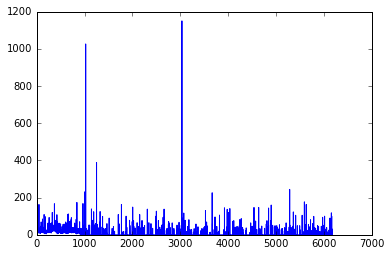

In [285]:
plt.plot(mh.fullhistogram(C.RLE.encode(ac3[0])))

In [233]:
print C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[0]).astype(np.uint64), format=lzma.FORMAT_RAW, filters=LZMA_filters))


15455


In [234]:
C.RLE.encode(ac3[0]).max()

6178

In [257]:
print C.Util.get_size(C.LZMA.compress(C.ZOPFLI.compress(C.RLE.encode(ac3[0]).astype(np.uint16)), format=lzma.FORMAT_RAW, filters=LZMA_filters))


14497


In [256]:
print C.Util.get_size(C.ZLIB.compress(C.ZOPFLI.compress(C.RLE.encode(ac3[0]).astype(np.uint64))))

42997


In [267]:
print C.Util.get_size(C.LZMA.compress(C.RLE.encode(ac3[1].astype(np.uint16)), format=lzma.FORMAT_RAW, filters=LZMA_filters))


14270


In [272]:
print C.Util.get_size(C.LZF.compress(C.RLE.encode(ac3[1].astype(np.uint16))))#, format=lzma.FORMAT_RAW, filters=LZMA_filters))


NameError: global name 'lzf' is not defined

In [273]:
def lz78(data):
    dictionary, w = {0: ''}, 0
    
    # overwrite setter of dictionary to use 0 as a key if not available
    d_dict = lambda dictionary, key: dictionary.get(key) or dictionary.__setitem__(key, len(dictionary)) or 0
    
    out = []
    for c in data:
        for e in [(w, c)]:
            out += [e for w in [d_dict(dictionary, e)] if not w]
            
    print out + [(w, '')] # add end

In [276]:
len(lz78(ac3[0].tobytes()))

[(0, '\xdc'), (0, '\x0b'), (0, '\x00'), (3, '\x00'), (4, '\x00'), (1, '\x0b'), (5, '\x00'), (4, '\xdc'), (2, '\x00'), (7, '\x00'), (6, '\x00'), (10, '\xdc'), (9, '\x00'), (7, '\xdc'), (13, '\x00'), (5, '\xdc'), (15, '\x00'), (8, '\x0b'), (10, '\x00'), (11, '\x00'), (14, '\x0b'), (19, '\xdc'), (17, '\x00'), (3, '\xdc'), (23, '\x00'), (20, '\x00'), (16, '\x0b'), (22, '\x0b'), (28, '\x00'), (12, '\x0b'), (29, '\x00'), (21, '\x00'), (30, '\x00'), (33, '\x00'), (32, '\x00'), (35, '\x00'), (27, '\x00'), (34, '\x00'), (37, '\x00'), (36, '\x00'), (18, '\x00'), (38, '\x00'), (41, '\x00'), (40, '\x00'), (24, '\x0b'), (31, '\x00'), (39, '\x00'), (47, '\x00'), (43, '\x00'), (48, '\x00'), (45, '\x00'), (42, '\x00'), (51, '\x00'), (44, '\x00'), (26, '\x00'), (49, '\x00'), (56, '\x00'), (53, '\x00'), (50, '\x00'), (55, '\x00'), (58, '\x00'), (57, '\x00'), (60, '\x00'), (63, '\xdc'), (25, '\xdc'), (65, '\x0b'), (46, '\x00'), (62, '\xdc'), (66, '\x00'), (52, '\x00'), (64, '\x0b'), (67, '\x00'), (61, '\

TypeError: object of type 'NoneType' has no len()

In [290]:
com_alg = [C.ZLIB, C.NG]
enc_alg = [C.NE, C.RLE]
C.Util.run_experiments(data=ac3[0:64], N=1, com_alg=com_alg, enc_alg=enc_alg)

Zlib: 130.029100583
Zlib: 206.454112136


KeyboardInterrupt: 